# Naive Bayes

Naive Bayes is a powerful machine-learning algorithmn which is used for machine-learning and probabilistic modelling. It utilises the Baye's Theorem and is most useful for textual analysis, for any categorical identification, may it be in the areas of education, security, health and social sector.  

Naive Bayes is built on the Bayes' theorem, which is a conditional probability model. Wherein, it allows the user to calculate the probabilities of a particular class or a category given a set of features or independant variables. As the features are assumed to be independant, the probability is calculated on basis of that assumption.

Naive Bayes' primary goal is to classify data into specified classes or categories based on observed attributes. This is accomplished by taking into account both the prior probability of each class (as informed by historical data or domain knowledge) and the likelihood of witnessing the provided traits under each class. This data is used to compute the conditional probability of each class and determine which class is more likely given the given data.

There are various types of Naive Bayes: 

1. The Gaussian Naive Bayes algorithm is appropriate for continuous or real-valued data, such as medical measures. 
2. Multinomial Naive Bayes excels at text classification, which makes it useful for tasks such as spam detection and sentiment analysis when features represent word counts or phrase frequencies. 
3. Bernoulli Naive Bayes is an excellent choice for working with binary data, and it is frequently
   
Due to Naive Bayes' computational efficiency and the ability to carry it on with simplicity, the approach is appealing to many machine learning practitioners. You can acquire accurate and relevant classification results by picking the proper Naive Bayes variant and applying it to your specific dataset. Naive Bayes is especially well-suited for scenarios requiring speed, simplicity, and a probabilistic approach. Because of its probabilistic character and foundation in Bayes' theorem, it can make educated decisions and is a vital addition to the machine learning toolset.

In [1]:

import  pandas  as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [2]:
# user-defined functions to calculate accuracy
def accuracy(y,ypred):
    #compute accuracy
    print("Accuracy:", accuracy_score(y, ypred)*100)
    
def precision(y,ypred):
    #compute precision
    print("Precision Score:", precision_score(y, ypred, average="micro")*100)
    
def recall(y,ypred):
    #compute recall
    print("Recall Score:", recall_score(y, ypred, average="micro")*100)


def f1(y,ypred):
    #compute f1
    print("F1 Score:", f1_score(y, ypred, average="micro")*100)

## Naive Bayes for Quantitative data

As my data consists of data for 5 BRICS nations separately and also contains a dataframe which is a culmination of my existing datasets. As discussed in the cleaning section, the stacked_df has self generated labels section that I had created to ensure it is usable for Naive Bayes. Whilst it is not actually recommended to create self-generated labels for the datasets, especially for the economic data as it works on the progression of time and things are extremely volatile. However, for utilising Naive Bayes I had created it. So my utilisation of Naive Bayes taking the entire dataset into consideration is so I used the Gaussian Naive Bayes data as it is useful for the real-life data. 

In [3]:
india=pd.read_csv('../data/csv_files_numerical_countries/india.csv')
russia=pd.read_csv('../data/csv_files_numerical_countries/russia.csv')
china=pd.read_csv('../data/csv_files_numerical_countries/china.csv')
brazil=pd.read_csv('../data/csv_files_numerical_countries/brazil.csv')
southafrica=pd.read_csv('../data/csv_files_numerical_countries/southafrica.csv')
stacked_df = pd.concat([india, russia, china, brazil, southafrica])

In [4]:
stacked_df.isna().sum()
stacked_df = stacked_df.dropna()

In [5]:

numerical_columns = stacked_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(stacked_df[numerical_columns]), columns=numerical_columns)
stacked_df[df_standardized.columns] = df_standardized
print(stacked_df.head(5))

       year  adj_NNI_g  adj_NNI_c  adj_savings_fix_cap_GNI  \
0 -1.836926   1.211664  -0.705121                 0.393875   
1 -1.756840  -1.129654  -0.717481                 0.442708   
2 -1.676754  -0.454036  -0.709869                 0.504223   
3 -1.596668   1.144657  -0.654868                 0.446455   
4 -1.516582  -0.417719  -0.645040                 0.499170   

   adj_savings_edu_GNI  adj_NNS_GNI  curr_acc_bal  ex_imp_gdp  ex_imp_growth  \
0            -1.010335    -0.408151     -1.134653   -0.391100       0.098823   
1            -1.010335    -0.274835     -1.169065   -0.413871      -0.657708   
2            -0.955520    -0.320892     -1.158242   -0.408582       0.196687   
3            -0.943078    -0.323459     -1.129084   -0.424880      -0.669952   
4            -0.998182    -0.313247     -1.145000   -0.375005       0.356302   

   ex_debt_shocks  ...       cpi  inflation  real_interest_rate  \
0       -2.331331  ... -0.398574  -0.668898           -1.288718   
1       -2.2

In [6]:
stacked_df = stacked_df.dropna()
stacked_df.isna().sum()

year                             0
adj_NNI_g                        0
adj_NNI_c                        0
adj_savings_fix_cap_GNI          0
adj_savings_edu_GNI              0
adj_NNS_GNI                      0
curr_acc_bal                     0
ex_imp_gdp                       0
ex_imp_growth                    0
ex_debt_shocks                   0
final_consump_exp_gdp            0
final_consump_exp_growth         0
fdi_net_inflows                  0
fdi_net_outflows                 0
gdp_growth                       0
gdp_per_capita_growth            0
gener_govt_fin_consump_exp       0
gni_growth                       0
goods_exp_bop                    0
goods_imp_bop                    0
imports_goods_services_gdp       0
imports_goods_services_growth    0
services_gdp                     0
services_growth                  0
short_term_debt_tot_reserves     0
trade_gdp                        0
cpi                              0
inflation                        0
real_interest_rate  

In [7]:
stacked_df.drop(columns='year')

,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,ex_debt_shocks,final_consump_exp_gdp,...,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year.1,labels
0,1.211664,-0.705121,0.393875,-1.010335,-0.408151,-1.134653,-0.391100,0.098823,-2.331331,1.629755,...,-0.398574,-0.668898,-1.288718,-0.687387,0.466640,0.569132,-1.936929,0.360350,-1.836926,High Growth
1,-1.129654,-0.717481,0.442708,-1.010335,-0.274835,-1.169065,-0.413871,-0.657708,-2.243219,1.580500,...,-0.371809,-0.642555,-1.260266,-0.687387,0.480544,0.527471,-1.921123,0.409013,-1.756840,High Growth
2,-0.454036,-0.709869,0.504223,-0.955520,-0.320892,-1.158242,-0.408582,0.196687,-1.929006,1.567708,...,-0.353591,-0.720427,-1.142488,-0.687387,0.494275,0.601982,-1.840814,0.556365,-1.676754,Moderate Growth
3,1.144657,-0.654868,0.446455,-0.943078,-0.323459,-1.129084,-0.424880,-0.669952,-1.821442,1.576719,...,-0.324027,-0.661114,-1.162604,-0.687387,0.507809,0.617031,-1.738525,0.535915,-1.596668,Very High Growth
4,-0.417719,-0.645040,0.499170,-0.998182,-0.313247,-1.145000,-0.375005,0.356302,-1.578976,1.557486,...,-0.300846,-0.714042,-1.134845,-0.687387,0.520998,0.752971,-1.654926,0.622921,-1.516582,Moderate Growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,-0.079197,-0.393533,-0.173223,2.646487,-0.809397,0.709016,-2.224949,-0.581400,-0.018377,-0.876474,...,-0.568803,-0.324423,0.608011,-0.791993,-0.491076,0.959402,0.915725,1.200695,-0.395379,Low Growth
46,-1.755485,-0.444716,-1.680063,2.520925,-0.809397,0.533660,-2.358258,-0.552348,1.082878,-0.808123,...,-0.677560,1.016738,0.985550,-0.738046,-0.172467,1.579092,0.933567,-0.011703,-0.315293,Low Growth
47,2.593355,-0.292355,2.254327,1.198101,-0.809244,1.259113,-0.108950,0.902195,3.118460,-0.543260,...,-0.555552,1.052491,1.589457,-0.524708,1.258840,-3.343034,0.877097,0.304242,-0.235207,Low Growth
48,2.910178,-0.091072,2.559309,0.705554,-0.809092,1.867200,1.203704,1.627926,3.261046,-0.591679,...,-0.453991,0.004715,1.531847,-0.428589,-0.342242,-2.153784,0.850222,0.521039,-0.155121,Very High Growth


We drop the year column since we have stacked the dataframe on top of each year. When we analyse the data, usually, especially countries like the BRICS, we either analyse on basis of a single year or do it for a single country according to time. When you want the time parameter to be part of the dataset, the problem that can be seen is that you can't analyse all the countries together. But if you want to do it separately for all the datasets, the sample size is often doing to be smaller and be biased for that specific country's performance. Hence, for us, the year column is dropped.

### Feature-Selection Method

The feature-selection method plays an important role in understanding which features to select as most of the times high multicollinearity can affect the dataset. According to this, the features mentioned below, the top 10 and the bottom 10 are the features that are highly correlated with each other and can be removed.

In [47]:
# finding correlations - top 10 and bottom 10
corr = stacked_df.corr()

positive_corr = corr[corr > 0].stack().sort_values(ascending=False).head(50)
print("Top 10 Positive Correlations:")
display(positive_corr)

negative_corr = corr[corr < 0].stack().sort_values(ascending=True).head(15)
print("\nTop 10 Negative Correlations:")
display(negative_corr)

Top 10 Positive Correlations:


/var/folders/cm/1bq_zvw92w99j_5d1p5jq5v40000gn/T/ipykernel_97111/4149099563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = stacked_df.corr()


year                           year                             1.000000
final_consump_exp_growth       final_consump_exp_growth         1.000000
gni_growth                     gni_growth                       1.000000
gener_govt_fin_consump_exp     gener_govt_fin_consump_exp       1.000000
gdp_per_capita_growth          gdp_per_capita_growth            1.000000
gdp_growth                     gdp_growth                       1.000000
fdi_net_outflows               fdi_net_outflows                 1.000000
fdi_net_inflows                fdi_net_inflows                  1.000000
final_consump_exp_gdp          final_consump_exp_gdp            1.000000
adj_NNI_c                      adj_NNI_c                        1.000000
ex_debt_shocks                 ex_debt_shocks                   1.000000
ex_imp_growth                  ex_imp_growth                    1.000000
ex_imp_gdp                     ex_imp_gdp                       1.000000
curr_acc_bal                   curr_acc_bal        


Top 10 Negative Correlations:


final_consump_exp_gdp          fdi_net_inflows                 -0.955139
fdi_net_inflows                final_consump_exp_gdp           -0.955139
adj_savings_edu_GNI            gener_govt_fin_consump_exp      -0.949196
gener_govt_fin_consump_exp     adj_savings_edu_GNI             -0.949196
final_consump_exp_gdp          imports_goods_services_growth   -0.938298
imports_goods_services_growth  final_consump_exp_gdp           -0.938298
final_consump_exp_gdp          services_gdp                    -0.934168
services_gdp                   final_consump_exp_gdp           -0.934168
services_growth                final_consump_exp_gdp           -0.921622
final_consump_exp_gdp          services_growth                 -0.921622
                               curr_acc_bal                    -0.913581
curr_acc_bal                   final_consump_exp_gdp           -0.913581
real_interest_rate             final_consump_exp_gdp           -0.892014
final_consump_exp_gdp          real_interest_rate  

We see that these are highly positively correlated values after filtering the correlation within itself and the highly negatively correlated values. These variables can cause high multicollinearity and hence should be dropped.

In [9]:
correlation_threshold = 0.8  # Adjust as needed
negative_correlation_threshold = -0.8  # Adjust as needed

columns_to_drop = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > correlation_threshold or corr.iloc[i, j] < negative_correlation_threshold:
            colname = corr.columns[i]
            columns_to_drop.add(colname)


stacked_df_dropped = stacked_df.drop(columns=columns_to_drop)

print(stacked_df_dropped)

        year  adj_NNI_g  adj_savings_fix_cap_GNI  adj_savings_edu_GNI  \
0  -1.836926   1.211664                 0.393875            -1.010335   
1  -1.756840  -1.129654                 0.442708            -1.010335   
2  -1.676754  -0.454036                 0.504223            -0.955520   
3  -1.596668   1.144657                 0.446455            -0.943078   
4  -1.516582  -0.417719                 0.499170            -0.998182   
..       ...        ...                      ...                  ...   
45 -0.395379  -0.079197                -0.173223             2.646487   
46 -0.315293  -1.755485                -1.680063             2.520925   
47 -0.235207   2.593355                 2.254327             1.198101   
48 -0.155121   2.910178                 2.559309             0.705554   
49 -0.075035  -0.293256                -0.327189             0.661458   

    adj_NNS_GNI  ex_imp_growth  ex_debt_shocks  fdi_net_outflows  gdp_growth  \
0     -0.408151       0.098823       -2.331

With a threshold of 0.8, we remove all the columns above and below. Economic data is obviously highly correlated which is why methods like Naive Bayes won't suffice, and are in need of advanced econometrics models, however, attempting to reduce multicollinearity as much as possible is better. 

## Train-Test-Split

Since our data consists of user-defined labels that are the dependant values and the quantitative data which are the independant values. And then the data is separated into training, testing and classification.

In [10]:
Y = stacked_df_dropped['labels']
X =  stacked_df_dropped.drop(['labels'],axis =1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
x_train_valid, x_valid_test, y_train_valid, y_valid_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print('Train data    : ' + str(X_train.shape))
print('Test data     : ' + str(X_test.shape))
print('Train Output  : ' + str(y_train.shape))
print('Test Output   : ' + str(y_test.shape))
print('Valid Train data    : ' + str(x_train_valid.shape))
print('Valid Test data     : ' + str(x_valid_test.shape))
print('Valid Train Output  : ' + str(y_train_valid.shape))
print('Valid Test Output   : ' + str(y_valid_test.shape))

yop = [str(i) for i in Y] 
le = preprocessing.LabelEncoder()
Y_op = le.fit_transform(yop)
print(le.classes_)

Train data    : (88, 13)
Test data     : (23, 13)
Train Output  : (88,)
Test Output   : (23,)
Valid Train data    : (11, 13)
Valid Test data     : (12, 13)
Valid Train Output  : (11,)
Valid Test Output   : (12,)
['High Growth' 'Low Growth' 'Moderate Growth' 'Very High Growth']


In [11]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [12]:
# Predicting the train data and test data
pred_train = naive_bayes.predict(X_train)
pred_test = naive_bayes.predict(X_test)
pred_valid = naive_bayes.predict(x_train_valid)

In [13]:
# Training data
accuracy(y_train, pred_train)
precision(y_train, pred_train)
recall(y_train, pred_train)
f1(y_train, pred_train)
    

Accuracy: 28.40909090909091
Precision Score: 28.40909090909091
Recall Score: 28.40909090909091
F1 Score: 28.40909090909091


In [14]:
# Testing Data
accuracy(y_test, pred_test)
precision(y_test, pred_test)
recall(y_test, pred_test)
f1(y_test, pred_test)

Accuracy: 13.043478260869565
Precision Score: 13.043478260869565
Recall Score: 13.043478260869565
F1 Score: 13.043478260869565


In [15]:
# Validation 
accuracy(y_train_valid, pred_valid)
precision(y_train_valid, pred_valid)
recall(y_train_valid, pred_valid)
f1(y_train_valid, pred_valid)

Accuracy: 18.181818181818183
Precision Score: 18.181818181818183
Recall Score: 18.181818181818183
F1 Score: 18.181818181818183


When applied to the economic dataset, the Naive Bayes model performs less than optimally on a number of evaluation metrics. The model's performance during training yields a about 28.41% accuracy, precision, recall, and F1 score, suggesting a moderate capacity to identify patterns in the training set. But the model performs much worse when evaluated on untested data; accuracy, precision, recall, and F1 score all fall to about 13.04%. This significant decline indicates possible limits in the Naive Bayes model's capacity to identify intricate correlations within the data by indicating that it has trouble generalising well to new cases. The validation findings highlight the difficulties the model has in robustly forecasting GDP growth rates, with accuracy, precision, recall, and an F1 score of roughly 18.18%. Considering the training, testing, and validation sets' combined low scores, it appears that the Naive Bayes strategy may not be the best choice for this regression job. 

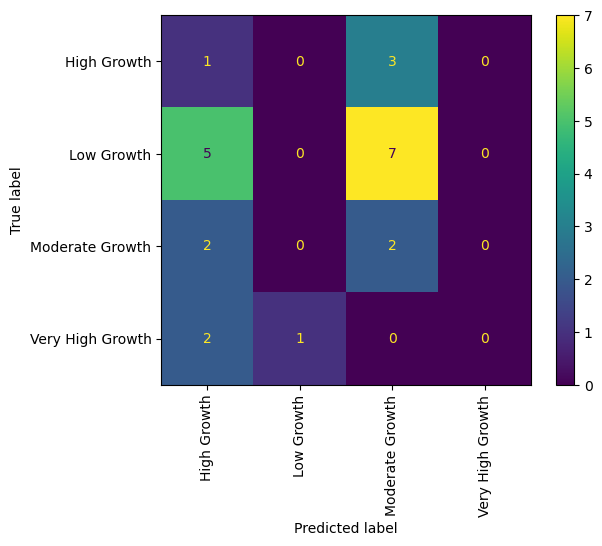

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_test,xticks_rotation='vertical')

According to the confusion matrix in the testing data, we see that the Low Growth not been predicted properly, followed by Moderate Growth. This is also a problem that comes when we self-merge the dataset as we don't exactly know the 'ground truth'.

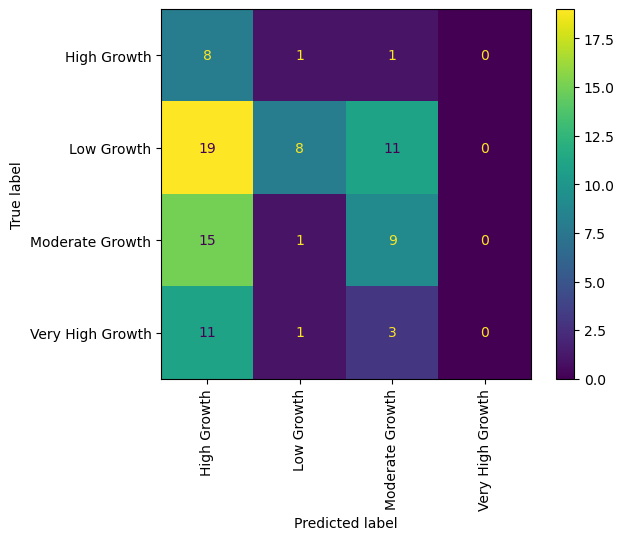

In [17]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train,xticks_rotation='vertical')

In the training data, Low Growth, followed by Moderate Growth and then then Very-High growth have all been mislabelled.

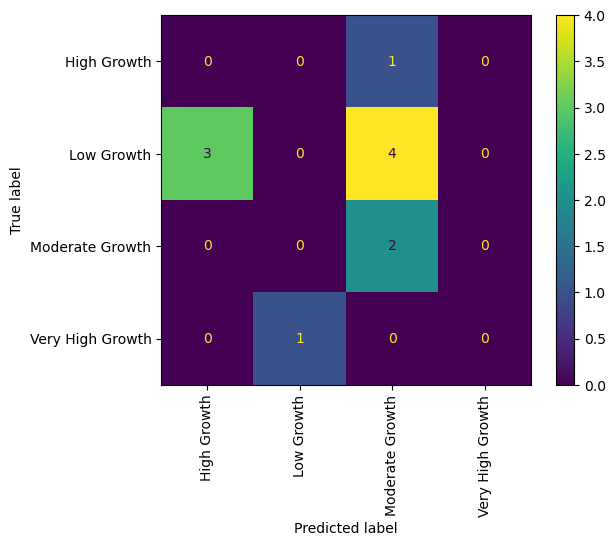

In [18]:
ConfusionMatrixDisplay.from_predictions(y_train_valid, pred_valid, xticks_rotation='vertical') 

The predictions dataset performs a little better than the testing data.

## Naive Bayes for Textual Data data

Understanding the textual data is also just as important since the textual data gives us a lot of information about whatever is happening in terms of the public opinion which is extremely important from the point of view of the data. Understanding and carefully making sure to categorise this is important as well. For this data, we have used the textual data that has been retrieved from the Reddit PRAW wrapper and has been labelled using the Sentiment Intensity Analyser. 

In [19]:
finaldf=pd.read_csv('../data/csv_files_textual/sentiment.csv')

In [20]:
finaldf.head(10)

,Unnamed: 0,cleaned_tweets,label
0,0,burn flag,0
1,1,plan kill petro dollar run manipulated western...,-1
2,2,difficult know whats going come summit next we...,-1
3,3,lot unpack brics would bring table officially ...,1
4,4,nice feel way thats brics supped make feel lik...,1
5,5,seems like well ahead schedule already 50 perc...,1
6,6,yeah precisely fully explained today family me...,1
7,7,watched lecture school predicted global south ...,1
8,8,think hope happens sooner rather later live eu...,1
9,9,supposed happen week hold boys,0


In [21]:

finaldf = finaldf.loc[:, ['cleaned_tweets', 'label']] 
finaldf.head(10)

,cleaned_tweets,label
0,burn flag,0
1,plan kill petro dollar run manipulated western...,-1
2,difficult know whats going come summit next we...,-1
3,lot unpack brics would bring table officially ...,1
4,nice feel way thats brics supped make feel lik...,1
5,seems like well ahead schedule already 50 perc...,1
6,yeah precisely fully explained today family me...,1
7,watched lecture school predicted global south ...,1
8,think hope happens sooner rather later live eu...,1
9,supposed happen week hold boys,0


In [22]:

X = finaldf['cleaned_tweets']  
Y = finaldf['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
x_train_valid, x_valid_test, y_train_valid, y_valid_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))
print('Valid Train data    :'+str(x_train_valid.shape))
print('Valid Test data     :'+str(x_valid_test.shape))
print('Valid Train Output  :'+str(y_train_valid.shape))
print('Valid Test Output   :'+str(y_valid_test.shape))

Train data    :(96,)
Test data     :(24,)
Train Output  :(96,)
Test Output   :(24,)
Valid Train data    :(12,)
Valid Test data     :(12,)
Valid Train Output  :(12,)
Valid Test Output   :(12,)


I divided the data into training, testing and validation. Training accounts for 80% of the data, testing accounts for 20% of the data and validation accounts for 50% of the data.

#### Feature extraction using TF-IDF

Term Frequency-Inverse Document Frequency, or TF-IDF, is a critical text analysis technique used to determine the significance of words in texts. It allocates numerical values to words based on their frequency in a document and rarity in a set of documents. TF-IDF aids in ranking and finding relevant texts, extracting key information, and reducing the dimensionality of text data by assigning higher scores to terms that are both frequent in the document and unique to it. Since my data contains information which can have strong sentiments associated to it, I utilised it.

In [23]:

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
x_train_valid_tfidf= tfidf_vectorizer.transform(x_train_valid)

In [24]:

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# training data
y_pred_train = mnb.predict(X_train_tfidf)
# testing data
y_pred_test = mnb.predict(X_test_tfidf)
#validation
y_pred_val = mnb.predict(x_train_valid_tfidf)

I utilised Multinomial Naive Bayes as it helps in textual classification concerning sentiment analysis. The values for accuracy, precision, recall and F1 have been calculated. It is seen that Training and Testing perform equally well, meaning there is no overfitting or underfitting seen.

In [25]:
# training
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average="micro")
recall_train = recall_score(y_train, y_pred_train, average="micro")
f1_train = f1_score(y_train, y_pred_train, average="micro")

print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision Score:", precision_train)
print("Recall Score:", recall_train)
print("F1 Score:", f1_train)

Training Set Metrics:
Accuracy: 0.6354166666666666
Precision Score: 0.6354166666666666
Recall Score: 0.6354166666666666
F1 Score: 0.6354166666666666


In [26]:
# testing
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average="micro")
recall_test = recall_score(y_test, y_pred_test, average="micro")
f1_test = f1_score(y_test, y_pred_test, average="micro")

print("Testing Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision Score:", precision_test)
print("Recall Score:", recall_test)
print("F1 Score:", f1_test)

Testing Set Metrics:
Accuracy: 0.5
Precision Score: 0.5
Recall Score: 0.5
F1 Score: 0.5


In [27]:
# validation
accuracy_val = accuracy_score(y_train_valid, y_pred_val)
precision_val = precision_score(y_train_valid, y_pred_val, average="micro")
recall_val = recall_score(y_train_valid, y_pred_val, average="micro")
f1_val = f1_score(y_train_valid, y_pred_val, average="micro")


print("\nValidation Set Metrics:")
print("Accuracy:", accuracy_val)
print("Precision Score:", precision_val)
print("Recall Score:", recall_val)
print("F1 Score:", f1_val)


Validation Set Metrics:
Accuracy: 0.5
Precision Score: 0.5
Recall Score: 0.5
F1 Score: 0.5


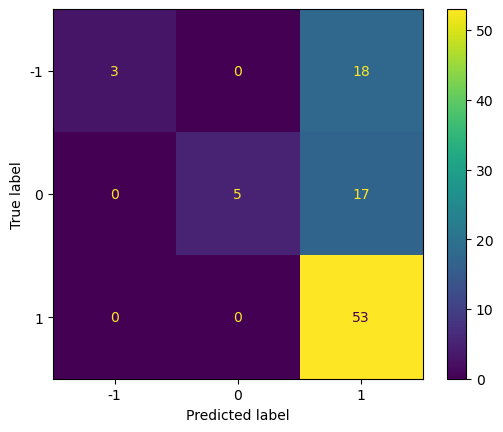

In [28]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)


For training dataset, if you see, the values have been labelled correctly but the 17 labels with 0 indicating no opinion has been predicted as 1 which means a positive sentiment. And similarly the negative sentiment has been predicting as positive sentiment.

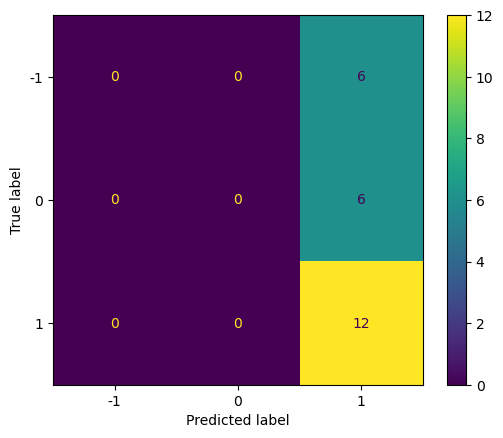

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

For testing dataset, if you see, the values have been labelled correctly but the 6 labels with 0 indicating no opinion has been predicted as 1 which means a positive sentiment. 6 of neutral sentiments with 0 have also been predicted as 1. 

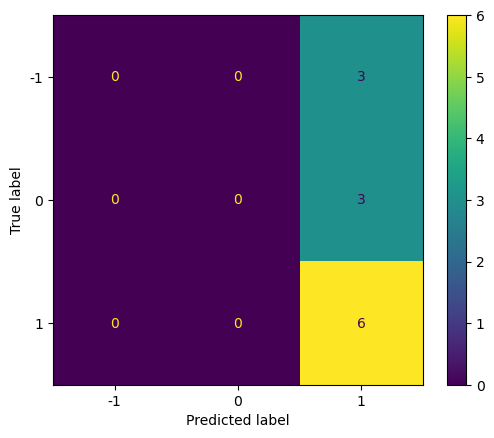

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train_valid, y_pred_val)

For the validationn dataset, we see that 1 has not be labelled properly but the other two are.

The model shows a reasonably stable performance on the training set, with high and stable scores in accuracy, precision, recall, and F1 score, all centred around 63.54%. This implies that the model was successful in identifying patterns in the training set. The performance drastically decreases when tested and validated, though, with all metrics showing a 50% accuracy, precision, recall, and F1 score.Because of the metrics' consistency, there may be a problem with overfitting on the training set, which could be preventing the model from generalising well to new data. More research may be required to improve the model's overall performance on testing and validation data as well as its capacity to generalise to new, unseen instances. This may involve tweaking the model, modifying hyperparameters, or utilising more advanced techniques.

## Sources

1. scikit-learn. (n.d.). TfidfVectorizer. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
2. scikit-learn. (n.d.). MultinomialNB. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
3. S, L. (2022, March). Gaussian Naive Bayes Algorithm for Credit Risk Modelling. Retrieved from https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/
4. Hrouda-Rasmussen, S. (n.d.). Gaussian Naive Bayes. Retrieved from https://towardsdatascience.com/gaussian-naive-bayes-4d2895d139a
5. scikit-learn. (n.d.). LabelEncoder. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
   